In [15]:
import numpy as np
import matplotlib.pyplot as plt
from derivatives import vacuum

In [16]:
data = np.load("T100TTFT.npz", allow_pickle=True)
print(data.files)

['settings', 'raw', 'prob']


In [17]:
settings = data['settings'].item()

In [18]:
settings

{'incl_thermal_term': True,
 'incl_anti_neutrinos': True,
 'incl_collisions': False,
 'incl_eta': True,
 'eta_e': 0.1,
 'eta_mu': -0.1,
 'N': 200,
 'eps_max': 10,
 'delta m-squared': 2.5e-15,
 'sin^2 (2theta)': 0.8,
 'T': 1}

In [19]:
e_max = settings['eps_max']
N = settings['N'] + 1
p = np.linspace(0, e_max, N)
E = p * settings['T']

In [20]:
raw = data['raw'].item()

In [21]:
nu3D = raw['nu3D']
nubar3D = raw['nubar3D']

In [22]:
def dnue_dE(E, P0, Pz):
    return E**2 / (2 * np.pi**2) * 1/2 * P0 * (1+Pz)
def dnumu_dE(E, P0, Pz):
    return E**2 / (2 * np.pi**2) * 1/2 * P0 * (1-Pz)

In [23]:
def plot_dnue_dE(data, t, bar):
    x = E[1:]
    y = np.zeros(len(x))
    for i in range(len(y)):
        y[i] = dnue_dE(x[i], data[t][i][0], data[t][i][3])
        
    plt.figure()
    plt.plot(x,y)
    plt.xlabel('Energy')
    if bar == False:
        plt.ylabel("dnu_e/dE")
        plt.title(f"dnu_e/dE vs. Energy for t={t}")
    else:
        plt.ylabel("dnu_e bar/dE")
        plt.title(f"dnu_e bar/dE vs. Energy for t={t}")
    plt.show()

In [24]:
def plot_dnumu_dE(data, t, bar):
    x = E[1:]
    y = np.zeros(len(x))
    for i in range(len(y)):
        y[i] = dnumu_dE(x[i], data[t][i][0], data[t][i][3])
        
    plt.figure()
    plt.plot(x,y)
    plt.xlabel('Energy')
    if bar == False:
        plt.ylabel("dnu_mu/dE")
        plt.title(f"dnu_mu/dE vs. Energy for t={t}")
    else:
        plt.ylabel("dnu_mu bar/dE")
        plt.title(f"dnu_mu bar/dE vs. Energy for t={t}")
    plt.show()

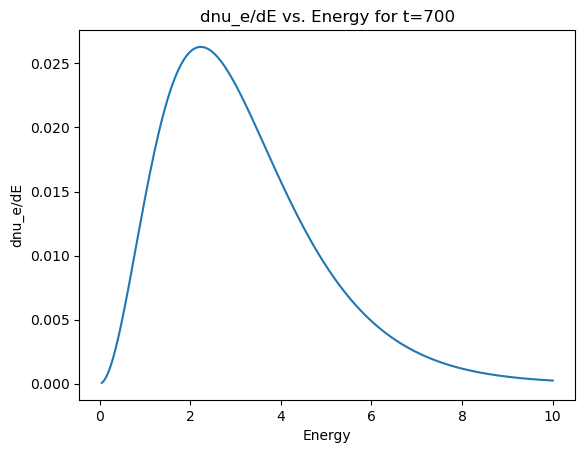

In [25]:
plot_dnue_dE(nu3D, 700, False)

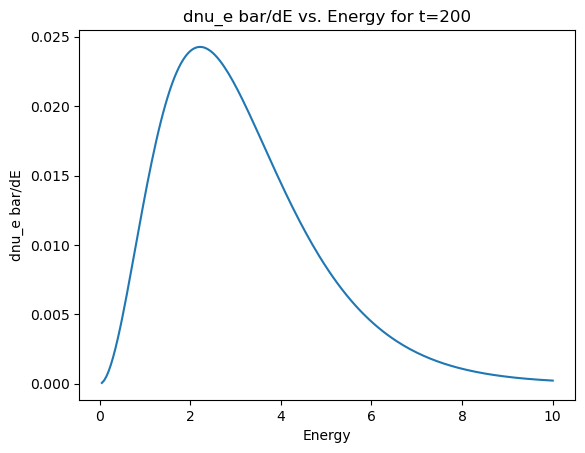

In [26]:
plot_dnue_dE(nu3D, 200, True)

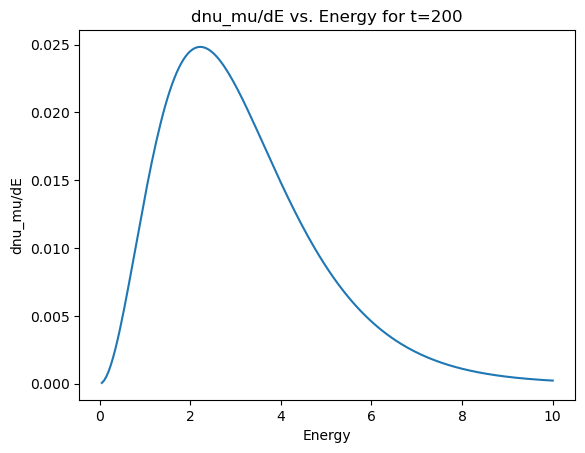

In [27]:
plot_dnumu_dE(nu3D, 200, False)

In [52]:
def color_map(c, title):
    plt.figure()
    plt.imshow(c[:,1:],origin='lower',aspect='auto')
    plt.xlabel("Energy")
    plt.ylabel("Time")
    plt.title(title)
    plt.colorbar()
    plt.show()

In [89]:
def create_c(function, data):
    c = np.zeros((len(data), len(E[1:])))
    for j in range(len(E[1:])):
        initial = function(E[j+1], data[0,j,0], data[0,j,3])
        for i in range(len(data)):
            c[i,j] = function(E[j+1], data[i,j,0], data[i,j,3]) / initial
    return c

In [53]:
c = np.zeros((len(nu3D), len(E[1:])))
for j in range(len(E[1:])):
    initial = dnue_dE(E[j+1], nu3D[0,j,0], nu3D[0,j,3])
    for i in range(len(nu3D)):
        c[i,j] = dnue_dE(E[j+1], nu3D[i,j,0], nu3D[i,j,3]) / initial

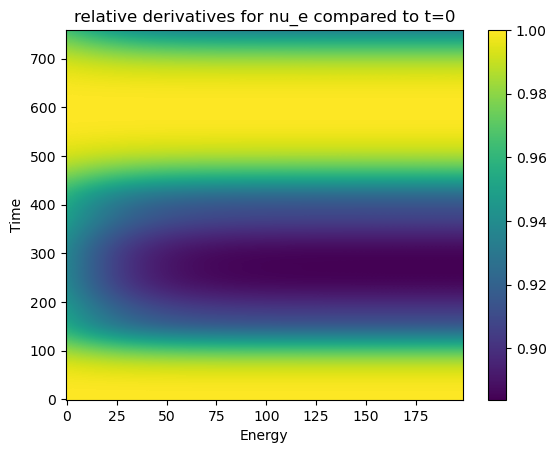

In [54]:
#color map for relative derivative value for dn_nue
color_map(c, "relative derivatives for nu_e compared to t=0")

In [59]:
c2 = np.zeros((len(nubar3D), len(E[1:])))
for j in range(len(E[1:])):
    initial = dnue_dE(E[j+1], nubar3D[0,j,0], nubar3D[0,j,3])
    for i in range(len(nubar3D)):
        c2[i,j] = dnue_dE(E[j+1], nubar3D[i,j,0], nubar3D[i,j,3]) / initial

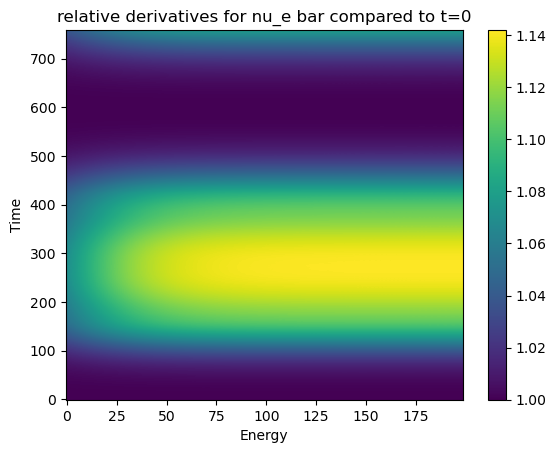

In [60]:
#color map for relative derivative value for dn_numubar
color_map(c2, "relative derivatives for nu_e bar compared to t=0")

In [76]:
c1 = np.zeros((len(nu3D), len(E[1:])))
for j in range(len(E[1:])):
    initial = dnumu_dE(E[j+1], nu3D[0,j,0], nu3D[0,j,3])
    for i in range(len(nu3D)):
        c1[i,j] = dnumu_dE(E[j+1], nu3D[i,j,0], nu3D[i,j,3]) / initial

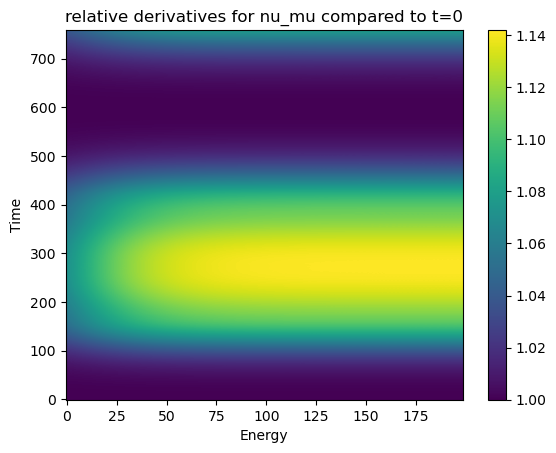

In [77]:
#color map for relative derivative value for dn_numu
color_map(c1, "relative derivatives for nu_mu compared to t=0")

In [68]:
c4 = np.zeros((len(nubar3D), len(E[1:])))
for j in range(len(E[1:])):
    initial = dnumu_dE(E[j+1], nubar3D[0,j,0], nubar3D[0,j,3])
    for i in range(len(nubar3D)):
        c4[i,j] = dnumu_dE(E[j+1], nubar3D[i,j,0], nubar3D[i,j,3]) / initial

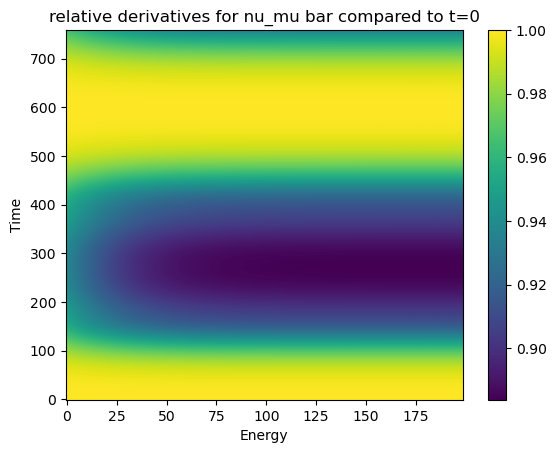

In [69]:
color_map(c4, "relative derivatives for nu_mu bar compared to t=0")

In [84]:
run20data = np.load("Run20-long.npz", allow_pickle=True)
raw2 = data['raw'].item()
nu3D2 = raw2['nu3D']
nubar3D2 = raw2['nubar3D']

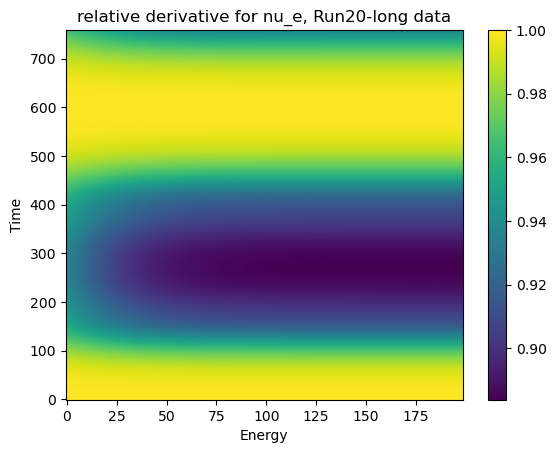

In [90]:
c5 = create_c(dnue_dE, nu3D2)
color_map(c5, "relative derivative for nu_e, Run20-long data")

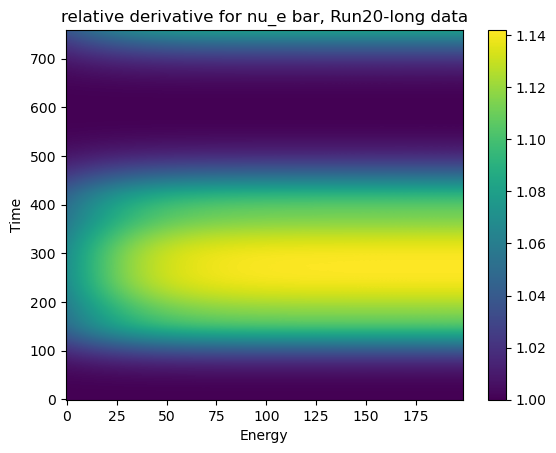

In [91]:
c6 = create_c(dnue_dE, nubar3D2)
color_map(c6, "relative derivative for nu_e bar, Run20-long data")

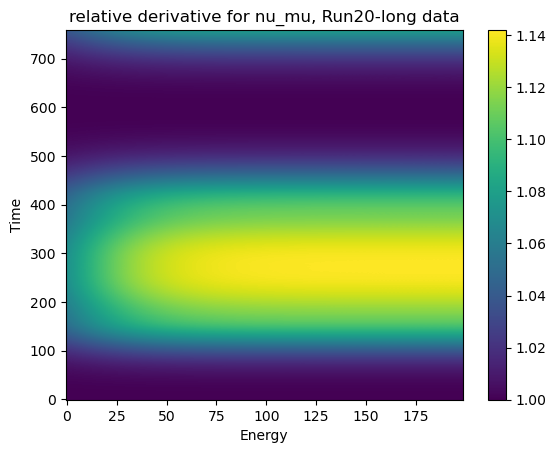

In [92]:
c7 = create_c(dnumu_dE, nu3D2)
color_map(c7, "relative derivative for nu_mu, Run20-long data")

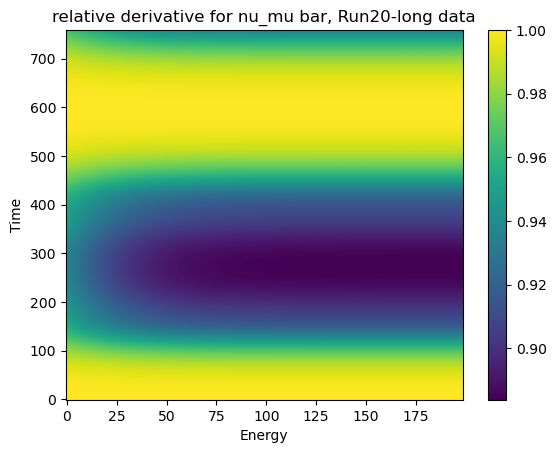

In [93]:
c5 = create_c(dnumu_dE, nubar3D2)
color_map(c5, "relative derivative for nu_mu bar, Run20-long data")